In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data

data=pd.read_csv("SolarPrediction.csv")

### Exploring the data

In [3]:
data.shape

(32686, 11)

In [4]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


### Data Pre-Processing
1. Converting all date and time into datetime format and extracting month, day, hour, minute, second
2. dropping the columns thar are not required

In [6]:
raw_data=data.copy()

In [7]:
raw_data["Data"].unique()

array(['9/29/2016 12:00:00 AM', '9/28/2016 12:00:00 AM',
       '9/27/2016 12:00:00 AM', '9/26/2016 12:00:00 AM',
       '9/25/2016 12:00:00 AM', '9/24/2016 12:00:00 AM',
       '9/23/2016 12:00:00 AM', '9/22/2016 12:00:00 AM',
       '9/21/2016 12:00:00 AM', '9/20/2016 12:00:00 AM',
       '9/19/2016 12:00:00 AM', '9/18/2016 12:00:00 AM',
       '9/17/2016 12:00:00 AM', '9/16/2016 12:00:00 AM',
       '9/15/2016 12:00:00 AM', '9/14/2016 12:00:00 AM',
       '9/13/2016 12:00:00 AM', '9/12/2016 12:00:00 AM',
       '9/11/2016 12:00:00 AM', '9/10/2016 12:00:00 AM',
       '9/9/2016 12:00:00 AM', '9/8/2016 12:00:00 AM',
       '9/7/2016 12:00:00 AM', '9/6/2016 12:00:00 AM',
       '9/5/2016 12:00:00 AM', '9/4/2016 12:00:00 AM',
       '9/3/2016 12:00:00 AM', '9/2/2016 12:00:00 AM',
       '9/1/2016 12:00:00 AM', '10/31/2016 12:00:00 AM',
       '10/30/2016 12:00:00 AM', '10/29/2016 12:00:00 AM',
       '10/28/2016 12:00:00 AM', '10/27/2016 12:00:00 AM',
       '10/26/2016 12:00:00 AM', '1

It is enough to extract day and month from this column

In [8]:
data["Data"]=raw_data["Data"].apply(pd.to_datetime)

In [9]:
data["Month"]=data["Data"].dt.month
data["Day"]=data["Data"].dt.day

In [10]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29


In [11]:
data["Time"]=raw_data["Time"].apply(pd.to_datetime, format="%H:%M:%S")

In [12]:
data["Hour"]=data["Time"].dt.hour
data["Minute"]=data["Time"].dt.minute
data["Second"]=data["Time"].dt.second

In [13]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,2016-09-29,1900-01-01 23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,2016-09-29,1900-01-01 23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,2016-09-29,1900-01-01 23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,2016-09-29,1900-01-01 23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,2016-09-29,1900-01-01 23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [14]:
data["TimeSunRise"]=raw_data["TimeSunRise"].apply(pd.to_datetime, format="%H:%M:%S")

In [15]:
data["sun_rise_Hour"]=data["TimeSunRise"].dt.hour
data["sun_rise_Minute"]=data["TimeSunRise"].dt.minute
data["sun_rise_Second"]=data["TimeSunRise"].dt.second

In [16]:
data["TimeSunSet"]=raw_data["TimeSunSet"].apply(pd.to_datetime, format="%H:%M:%S")

In [17]:
data["sun_set_Hour"]=data["TimeSunSet"].dt.hour
data["sun_set_Minute"]=data["TimeSunSet"].dt.minute
data["sun_set_Second"]=data["TimeSunSet"].dt.second

In [18]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,...,Day,Hour,Minute,Second,sun_rise_Hour,sun_rise_Minute,sun_rise_Second,sun_set_Hour,sun_set_Minute,sun_set_Second
0,1475229326,2016-09-29,1900-01-01 23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,...,29,23,55,26,6,13,0,18,13,0
1,1475229023,2016-09-29,1900-01-01 23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,...,29,23,50,23,6,13,0,18,13,0
2,1475228726,2016-09-29,1900-01-01 23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,...,29,23,45,26,6,13,0,18,13,0
3,1475228421,2016-09-29,1900-01-01 23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,...,29,23,40,21,6,13,0,18,13,0
4,1475228124,2016-09-29,1900-01-01 23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,...,29,23,35,24,6,13,0,18,13,0


In [19]:
data.drop(columns=["UNIXTime","Data","Time","TimeSunRise","TimeSunSet"],inplace=True)

In [20]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,sun_rise_Hour,sun_rise_Minute,sun_rise_Second,sun_set_Hour,sun_set_Minute,sun_set_Second
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,0,18,13,0
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,0,18,13,0
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,0,18,13,0
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,0,18,13,0
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,0,18,13,0


In [21]:
data.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,sun_rise_Hour,sun_rise_Minute,sun_rise_Second,sun_set_Hour,sun_set_Minute,sun_set_Second
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.0,32686.000000,32686.000000,32686.0
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,15.825766,11.557425,27.556691,17.441902,6.0,27.640519,0.0,17.347886,37.317904,0.0
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,8.711824,6.912034,17.268507,12.951109,0.0,15.518714,0.0,0.476307,15.938416,0.0
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,6.0,7.000000,0.0,17.000000,0.000000,0.0
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,9.000000,6.000000,15.000000,5.000000,6.0,14.000000,0.0,17.000000,26.000000,0.0
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,16.000000,12.000000,30.000000,18.000000,6.0,24.000000,0.0,17.000000,43.000000,0.0
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,23.000000,18.000000,45.000000,22.000000,6.0,40.000000,0.0,18.000000,48.000000,0.0
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,31.000000,23.000000,57.000000,59.000000,6.0,57.000000,0.0,18.000000,59.000000,0.0


In [22]:
data.shape

(32686, 17)

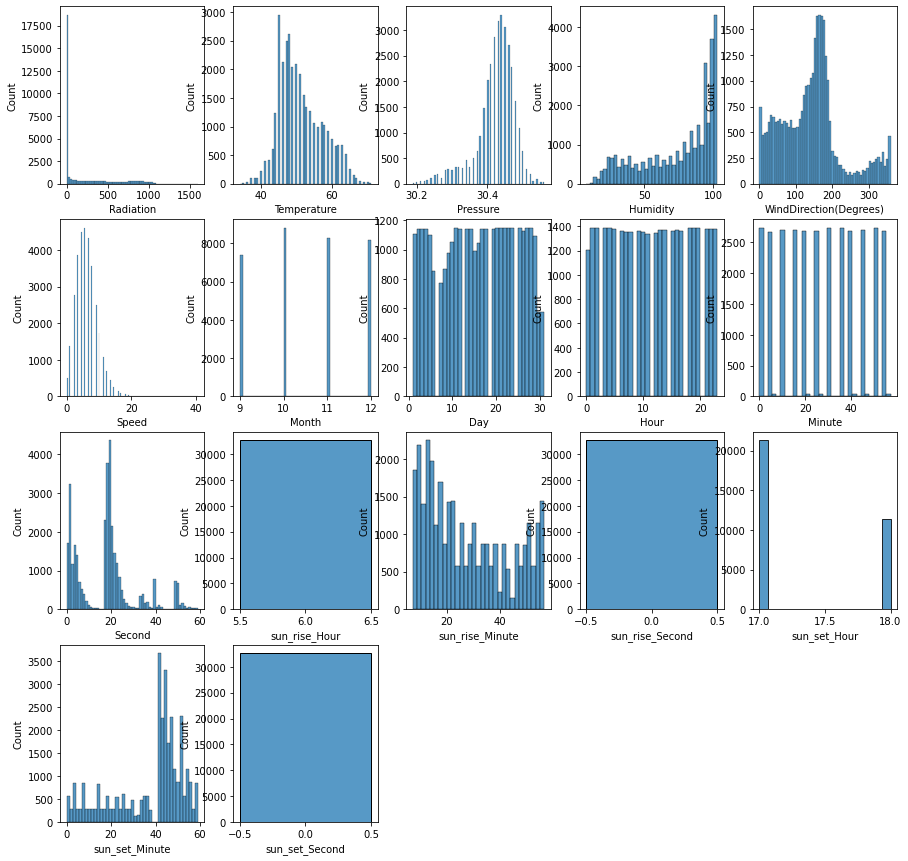

In [23]:
count=1
plt.figure(figsize=(15,15))
for col in data.select_dtypes(include="number"):
    plt.subplot(4,5,count)
    count+=1
    sns.histplot(data[col])
    plt.show

In [24]:
print(data["sun_rise_Hour"].nunique())
print(data["sun_rise_Second"].nunique())
print(data["sun_set_Second"].nunique())

1
1
1


So, we can drop the above columns since these columns have a single value

In [25]:
data.drop(columns=["sun_rise_Hour","sun_rise_Second","sun_set_Second"],inplace=True)

### Exploratory data Analysis

<AxesSubplot:>

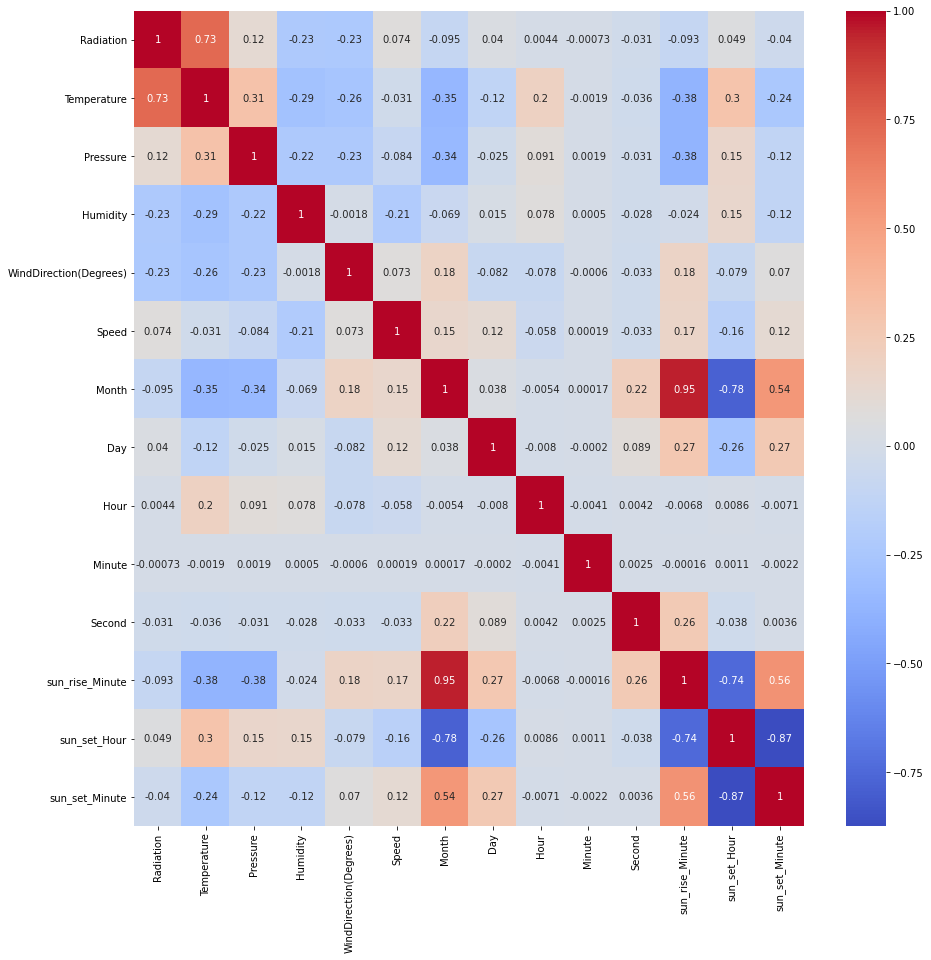

In [26]:
#correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [27]:
data.nunique()

Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
Month                         4
Day                          31
Hour                         24
Minute                       27
Second                       60
sun_rise_Minute              51
sun_set_Hour                  2
sun_set_Minute               56
dtype: int64

<Figure size 1080x1080 with 0 Axes>

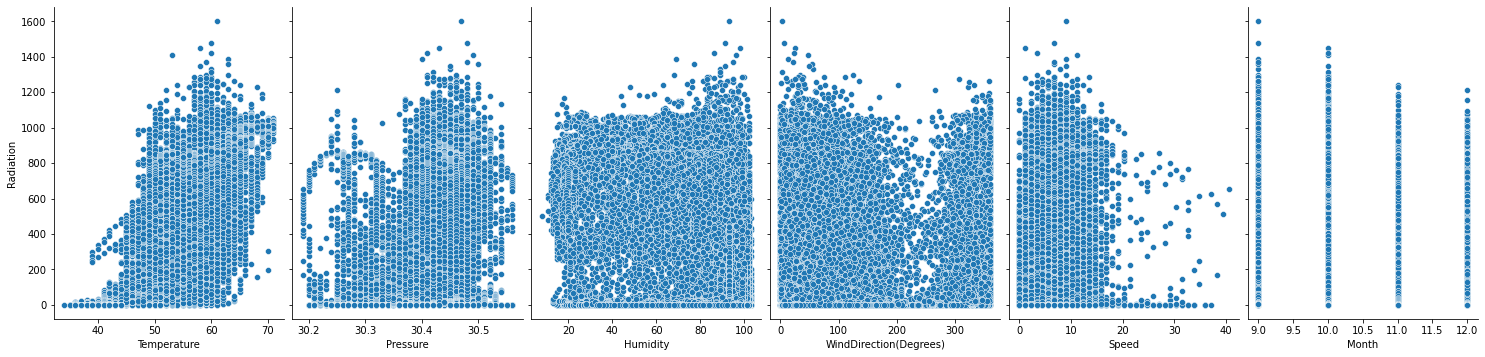

In [28]:
plt.figure(figsize=(15,15))
sns.pairplot(data,x_vars=data.columns[1:7],y_vars=["Radiation"],size=5,aspect=0.7)

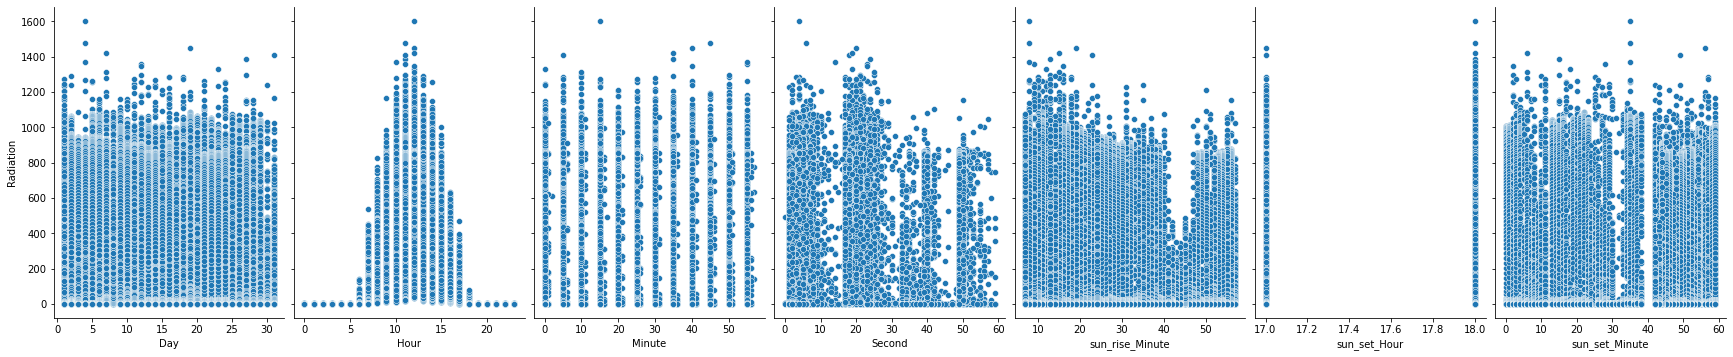

In [29]:
sns.pairplot(data,x_vars=data.columns[7:],y_vars=["Radiation"],size=5,aspect=0.7)

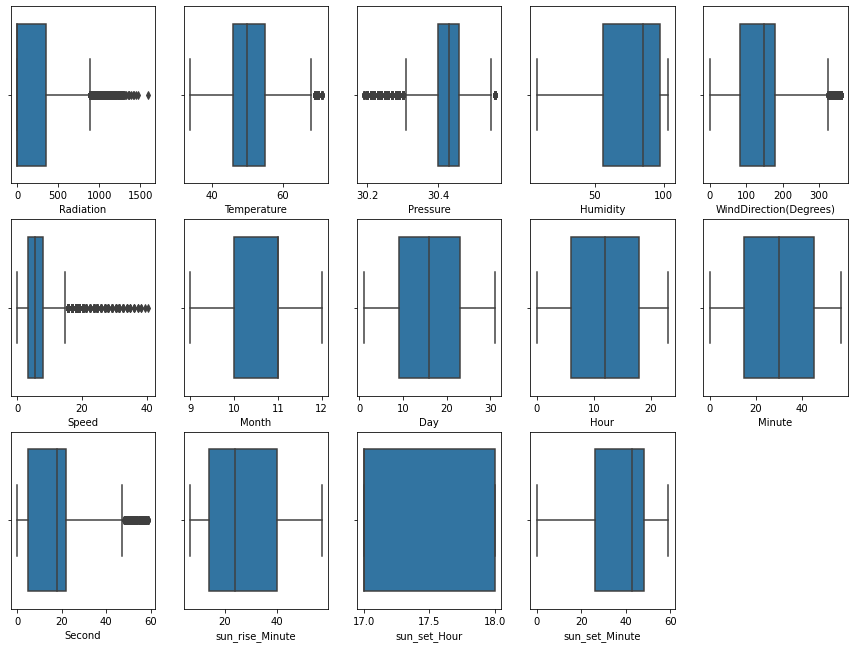

In [30]:
#outlier detection

count=1
plt.figure(figsize=(15,15))
for col in data.select_dtypes(include="number"):
    plt.subplot(4,5,count)
    count+=1
    sns.boxplot(data[col])
    plt.show

In [31]:
data.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,sun_rise_Minute,sun_set_Hour,sun_set_Minute
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,15.825766,11.557425,27.556691,17.441902,27.640519,17.347886,37.317904
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,8.711824,6.912034,17.268507,12.951109,15.518714,0.476307,15.938416
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,7.000000,17.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,9.000000,6.000000,15.000000,5.000000,14.000000,17.000000,26.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,16.000000,12.000000,30.000000,18.000000,24.000000,17.000000,43.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,23.000000,18.000000,45.000000,22.000000,40.000000,18.000000,48.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,31.000000,23.000000,57.000000,59.000000,57.000000,18.000000,59.000000


Columns Radiation,Temperature,Pressure, Winddirection, speed, second have outliers

In [32]:
# total percentage of outliers
pd.DataFrame((data<(data.quantile(0.25)-1.5*(data.quantile(0.75)-data.quantile(0.25)))) | (data>(data.quantile(0.75)+1.5*(data.quantile(0.75)-data.quantile(0.25))))).sum()*100/data.shape[0]

Radiation                 6.011748
Temperature               0.272288
Pressure                  5.084746
Humidity                  0.000000
WindDirection(Degrees)    4.950132
Speed                     1.465459
Month                     0.000000
Day                       0.000000
Hour                      0.000000
Minute                    0.000000
Second                    5.975035
sun_rise_Minute           0.000000
sun_set_Hour              0.000000
sun_set_Minute            0.000000
dtype: float64

In [33]:
data_without_outlier=data.copy()

In [34]:
def capping_outlier(col):
    q1=data_without_outlier[col].quantile(0.25)
    q3=data_without_outlier[col].quantile(0.75)
    iqr=q3-q1
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr
    data_without_outlier[col]=np.where(data_without_outlier[col]>upper_range,upper_range,data_without_outlier[col])
    data_without_outlier[col]=np.where(data_without_outlier[col]<lower_range,lower_range,data_without_outlier[col])
    

In [35]:
for i in ["Radiation","Temperature", "Pressure", "WindDirection(Degrees)", "Speed", "Second"]:
    capping_outlier(i)

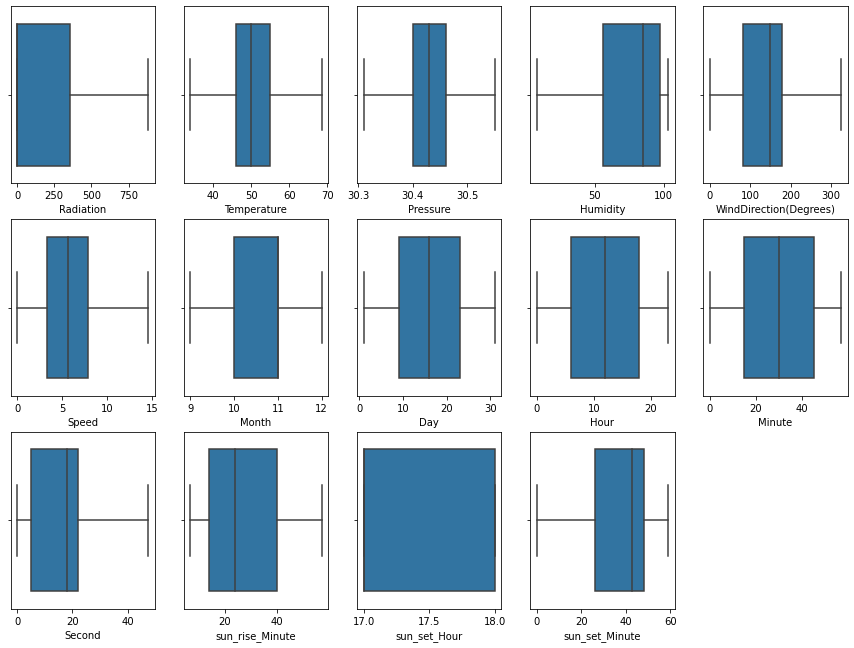

In [36]:
count=1
plt.figure(figsize=(15,15))
for col in data_without_outlier.select_dtypes(include="number"):
    plt.subplot(4,5,count)
    count+=1
    sns.boxplot(data_without_outlier[col])
    

Since Month, sun_rise_minute, sun_set_hour are highly correlated, we can use Lasso to filter out the features.
<br>Since our aim is prediction, data need not be normally distributed. if errors are not distributed we can do some transformations later.

### Preparing data for model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
x=data_without_outlier.drop(columns=["Radiation"])
y=data_without_outlier["Radiation"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
x_train.shape, x_test.shape

((26148, 13), (6538, 13))

In [41]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [42]:
X_train.shape, X_val.shape

((20918, 13), (5230, 13))

In [43]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(x_test)

### Model Building

There is no linearity found between independent and dependent variable (refer pairplot), so we need to do non linear regression but still lets try linear regression once 

#### Linear

In [44]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [45]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [46]:
lr.score(X_val,Y_val)

0.6455493285452831

In [74]:
lr.score(X_test,y_test)

0.634977511511559

In [70]:
lr_ypred=lr.predict(X_test)

<AxesSubplot:xlabel='Radiation', ylabel='Density'>

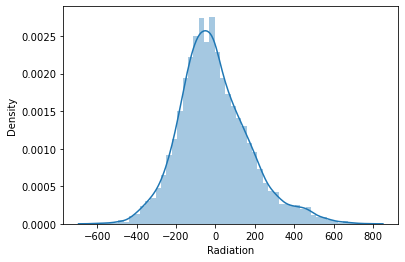

In [71]:
lr_residual=y_test-lr_ypred
sns.distplot(lr_residual,kde=True)

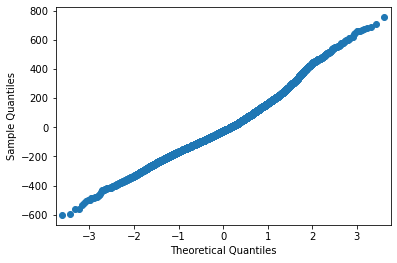

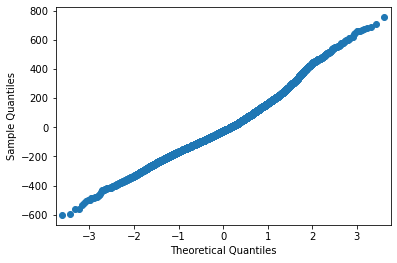

In [73]:
import statsmodels.api as sm
sm.qqplot(lr_residual)

Errors are normally distributed but the prediction score is very less, so we can try other non parametric models.

Regularization such as Ridge, Lasso are mostly to reduce overfit, our model has high bias(severly underfit), so those models are of no use.

In [145]:
#Just tried Ridge and lasso, not part of this project.

In [81]:
#ridge_reg=Ridge(alpha=50)
#ridge_reg.fit(X_train,Y_train)

Ridge(alpha=50)

In [82]:
#ridge_reg.score(X_val,Y_val)

0.6400756842388695

In [85]:
#lasso_reg=Lasso(alpha=0.1)
#lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [86]:
#lasso_reg.score(X_val,Y_val)

0.6453548830897153

#### SVR

In [51]:
from sklearn.svm import SVR

In [97]:
support_linear=SVR(kernel="linear")
support_linear.fit(X_train,Y_train)

SVR(kernel='linear')

In [146]:
support_linear.score(X_val,Y_val)

0.4576675192519126

As we know there is no linearity, the model finds it difficult to fit the datam linearly, thus the low score.

In [52]:
support=SVR(kernel="poly")
support.fit(X_train,Y_train)

SVR(kernel='poly')

In [53]:
support.score(X_val,Y_val)
#support.score(X_test,y_test)
#support.score(X_train,Y_train)

0.7229831788025518

In [103]:
support_rbf=SVR(kernel="rbf")
support_rbf.fit(X_train,Y_train)

SVR()

In [104]:
support_rbf.score(X_val,Y_val)

0.34834096992150065

Polynomial kernel captures more data than rbf kernel

#### Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
from sklearn.model_selection import RandomizedSearchCV

params={
    "max_depth":[None,5,10,15,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_leaf_nodes":[None,5,10],
}

In [92]:
tree=DecisionTreeRegressor()
random_search=RandomizedSearchCV(estimator=tree,param_distributions=params,cv=5)
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_leaf_nodes': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [93]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_depth': None}

In [94]:
random_search.best_score_

0.9116894797706545

In [95]:
best_tree=random_search.best_estimator_

In [96]:
best_tree.score(X_val,Y_val)

0.9198444555905456

#### Ensemble (Aggregation-Voting)

In [107]:
from sklearn.ensemble import VotingRegressor

In [115]:
LR=LinearRegression()
sv=SVR()
tr=DecisionTreeRegressor()

voting=VotingRegressor(estimators=[("lr",LR),("sv",sv),("tr",tr)])
voting.fit(X_train,Y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('sv', SVR()),
                            ('tr', DecisionTreeRegressor())])

In [117]:
voting.score(X_val,Y_val)

0.7792253448536515

This proves that the votingregressor may not always outperform individual model. From this we can conclude that all model are making same error. Voting performs better when different model captures different error.

In [150]:
# Thought-in future lets try to assign more weight to tree model since its more reliable.

#### Ensemble (Bagging)

In [118]:
from sklearn.ensemble import BaggingRegressor

In [153]:
bag=BaggingRegressor(SVR(kernel="poly"),n_estimators=50,max_samples=5000)
bag.fit(X_train,Y_train)

BaggingRegressor(base_estimator=SVR(kernel='poly'), max_samples=5000,
                 n_estimators=50)

In [154]:
bag.score(X_val,Y_val)

0.6649103824990024

#### Ensemble (RF)

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
rf.score(X_val,Y_val)

0.9439538837498948

In [155]:
# can perform hyperparamter tuning to avoid overfitting

### Ensemble(Boosting)

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [168]:
ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),n_estimators=50)
ada.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3))

In [169]:
ada.score(X_val,Y_val)

0.8145239925112174

Ada boost is prone to underfit, if base estimator has high bias, so max_depth is increased.

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
grd=GradientBoostingRegressor(max_depth=2,n_estimators=100)
grd.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=2)

In [144]:
grd.score(X_val,Y_val)

0.8582724017977252